# **Haberman's Survival Data Set**
* A data set to learn basics
* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings     Hospital.
* On the survival of patients who had undergone surgery for breast cancer.

#### **Dataset Source**
Dataset: https://www.kaggle.com/gilsousa/habermans-survival-data-set


#### **Attribute Information**

* Age of patient at time of operation (numerical)
* Patient’s year of operation (year — 1900, numerical)
- Number of positive auxillary nodes detected (numerical)
- Survival status (class attribute):
  1 = the patient survived 5 years or longer
  2 = the patient died within 5 years.


## Objective :
To predict whether the breast cancer patient will survive after 5 years based upon features like patient's age, year of treatment and the number of positive auxillary lymph nodes.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Load Iris.csv into a pandas dataFrame.

dataset=pd.read_csv('haberman.csv')
dataset.columns=['age','year_of_treatment','auxillary_nodes','survival_status']
dataset.head()

,age,year_of_treatment,auxillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [2]:
# as the ouput variable is numerical convert it into categorical.
def Conversion(x):
    if x == 1:
        return 'yes'
    return 'no'
dataset['survival_status']=dataset['survival_status'].apply(Conversion)
dataset['survival_status']=dataset['survival_status'].astype('category')


In [3]:
dataset.head()

,age,year_of_treatment,auxillary_nodes,survival_status
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes


In [4]:
#(Q) how many data-points and features?
print (dataset.shape)

(305, 4)


In [5]:
#(Q) What are the column names in our dataset?
print (dataset.columns)
print("No. of classes : ", dataset['survival_status'].describe().unique()[1])

Index(['age', 'year_of_treatment', 'auxillary_nodes', 'survival_status'], dtype='object')
No. of classes :  2


In [6]:
#(Q) How many data points for each class are present? 
dataset['survival_status'].value_counts()

yes    224
no      81
Name: survival_status, dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age                  305 non-null int64
year_of_treatment    305 non-null int64
auxillary_nodes      305 non-null int64
survival_status      305 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


#### **Observation** 
- Unbalanced dataset.
- Values are in integer format.
- non null values in all cloumns

## Univariate Analysis

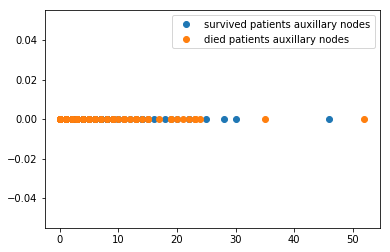

In [8]:
import numpy as np
survived_status=dataset.loc[dataset['survival_status']=='yes']
died_status=dataset.loc[dataset['survival_status']=='no']
plt.plot(survived_status['auxillary_nodes'],np.zeros_like(survived_status['auxillary_nodes']),'o')
plt.plot(died_status['auxillary_nodes'],np.zeros_like(died_status['auxillary_nodes']),'o')
plt.legend(['survived patients auxillary nodes','died patients auxillary nodes'])
plt.show()

**Histogram and pdf**

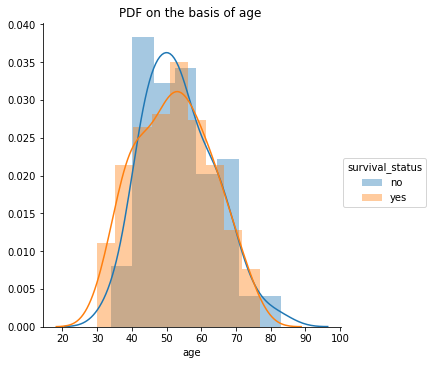

In [9]:
#age
sns.FacetGrid(dataset,hue='survival_status',size=5).map(sns.distplot,"age").add_legend();
plt.title('PDF on the basis of age ')
plt.show()

##### **Observation**
-  As we can see from plot that age is not a good feature for separating the two classes of survived and died persons because of the presence of overlappings.
- NUmber of patients died is more between 45-55 age.

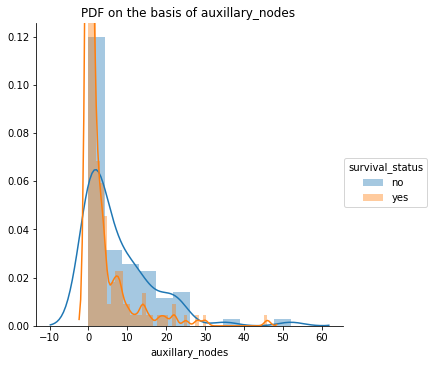

In [10]:
#auxillary_nodes
sns.FacetGrid(dataset,hue='survival_status',size=5).map(sns.distplot,"auxillary_nodes").add_legend();
plt.title('PDF on the basis of auxillary_nodes ')
plt.show()

#### **Observation**
- Auxillary node is the important feature as compared to age and year of treatment.
- Number of people died more those having positive auxillary nodes greater than 10.

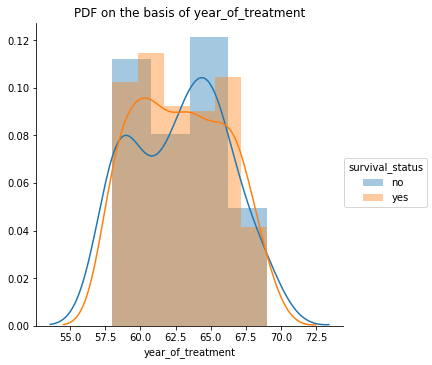

In [11]:
#year_of_treatment
sns.FacetGrid(dataset,hue='survival_status',size=5).map(sns.distplot,"year_of_treatment").add_legend();
plt.title('PDF on the basis of year_of_treatment')
plt.show()

#### **Observations**
- Number of people died more having year of treatmnet between 1963-1966



### **CDF**

[ 0.04910714  0.10714286  0.125       0.09375     0.16517857  0.16517857
  0.09375     0.11160714  0.0625      0.02678571]
[ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]


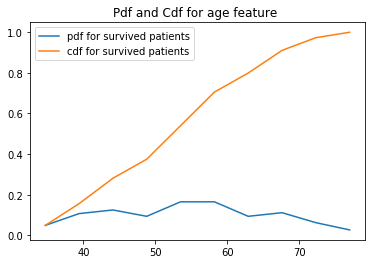

In [12]:
counts,bin_edges=np.histogram(survived_status['age'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('Pdf and Cdf for age feature ')
plt.legend(['pdf for survived patients','cdf for survived patients'])
plt.show()


[ 0.03703704  0.12345679  0.19753086  0.19753086  0.13580247  0.12345679
  0.09876543  0.04938272  0.02469136  0.01234568]
[ 34.   38.9  43.8  48.7  53.6  58.5  63.4  68.3  73.2  78.1  83. ]


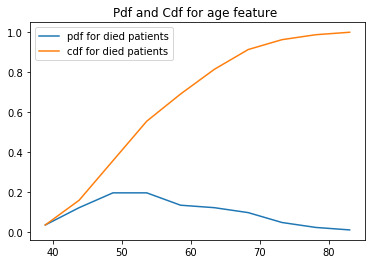

In [13]:
plt.close()
counts,bin_edges=np.histogram(died_status['age'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['pdf for died patients','cdf for died patients'])
plt.title('Pdf and Cdf for age feature ')
plt.show()

#### **Observation**
- 90% of patients are survived of age less than 70.
- Almost maximum number of patients are died of age greater than 75.

[ 0.83482143  0.08035714  0.02232143  0.02678571  0.01785714  0.00446429
  0.00892857  0.          0.          0.00446429]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


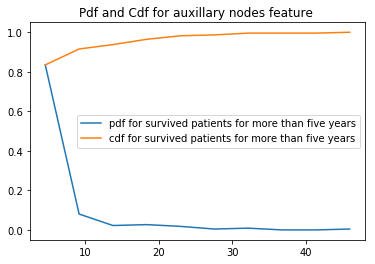

In [14]:
plt.close()
counts,bin_edges=np.histogram(survived_status['auxillary_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('Pdf and Cdf for auxillary nodes feature ')

plt.legend(['pdf for survived patients for more than five years','cdf for survived patients for more than five years'])
plt.show()

#### Observations
- Around 91% patients survived when their auxillary node is less than 10.

[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[ 0.83482143  0.91517857  0.9375      0.96428571  0.98214286  0.98660714
  0.99553571  0.99553571  0.99553571  1.        ]


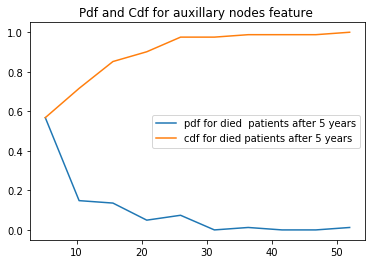

In [15]:
counts,bin_edges=np.histogram(died_status['auxillary_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(cdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['pdf for died  patients after 5 years','cdf for died patients after 5 years'])
plt.title('Pdf and Cdf for auxillary nodes feature ')

plt.show()

#### Observation
- 92% patients died who having lymph node is more than 20.

In [17]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(survived_status["auxillary_nodes"]))
#Median with an outlier
print(np.median(np.append(survived_status["auxillary_nodes"],50)));
print(np.median(died_status["auxillary_nodes"]))



print("\nQuantiles:")
print(np.percentile(survived_status["auxillary_nodes"],np.arange(0, 100, 25)))
print(np.percentile(died_status["auxillary_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(survived_status["auxillary_nodes"],90))
print(np.percentile(died_status["auxillary_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survived_status["auxillary_nodes"]))
print(robust.mad(died_status["auxillary_nodes"]))



Medians:
0.0
0.0
4.0

Quantiles:
[ 0.  0.  0.  3.]
[  0.   1.   4.  11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.93040887402


#### Boxplots

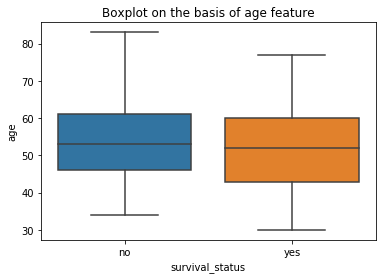

In [18]:
sns.boxplot(x='survival_status',y='age', data=dataset)
plt.title('Boxplot on the basis of age feature')
plt.show()

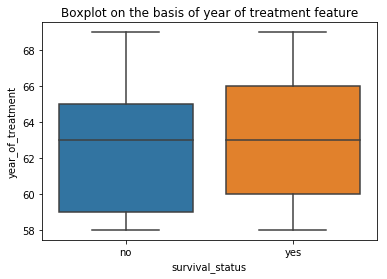

In [19]:
sns.boxplot(x='survival_status',y='year_of_treatment',data=dataset)
plt.title('Boxplot on the basis of year of treatment feature')

plt.show()

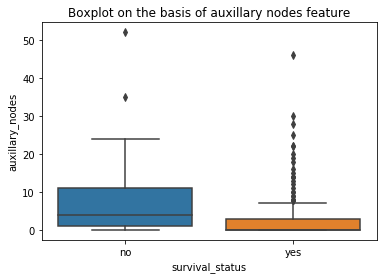

In [20]:
sns.boxplot(x='survival_status',y='auxillary_nodes',data=dataset)
plt.title('Boxplot on the basis of auxillary nodes feature')

plt.show()

#### Observations

- It is very hard to distinguish the survived patients and died patients pateints after five years on the basis of year_of_treatment and age attribute.
- 75% patients survived who having axillary lymph node is less than 4.



**Violin plots**

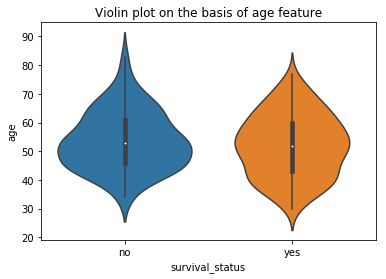

In [21]:
sns.violinplot(x='survival_status',y='age',data=dataset,size=8)
plt.title('Violin plot on the basis of age feature')

plt.show()

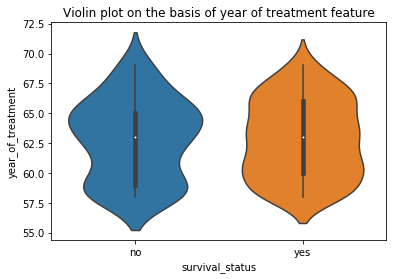

In [22]:
sns.violinplot(x='survival_status',y='year_of_treatment',data=dataset,size=8)
plt.title('Violin plot on the basis of year of treatment feature')

plt.show()

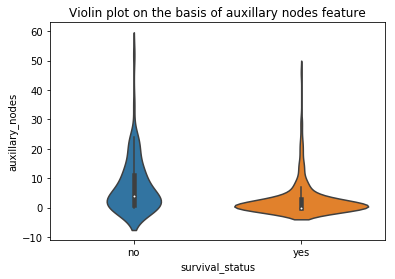

In [23]:
sns.violinplot(x='survival_status',y='auxillary_nodes',data=dataset,size=8)
plt.title('Violin plot on the basis of auxillary nodes feature')

plt.show()

### **Observations**
- 85% of the patients have less than or equal to 5 positive auxillary_nodes survived more than 5 years.
- Almost 78% patients died having positive auxillary_node upto 10 or more.

#### Contour plot

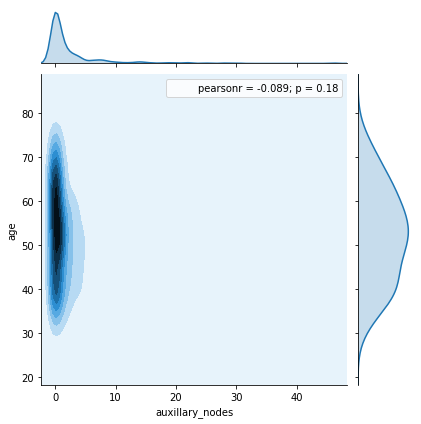

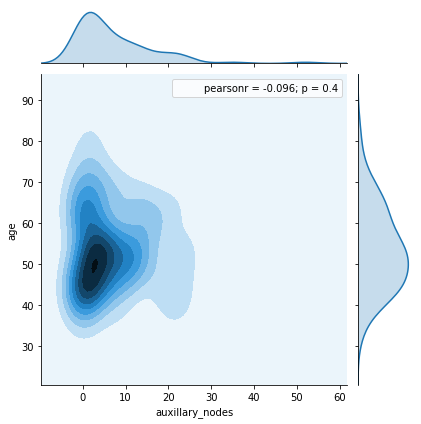

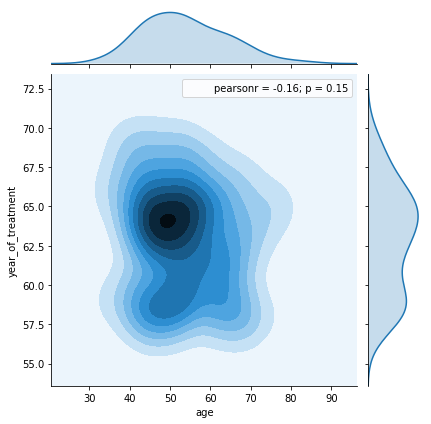

In [27]:
# contour plot using age and auxillary node

# auxillary vs age for SURVIVED patients
sns.jointplot(x="auxillary_nodes", y="age", data = survived_status , kind="kde");

# auxillary vs age for DIED patients
sns.jointplot(x="auxillary_nodes", y="age", data = died_status , kind="kde");


# 'year of treatement' vs age for DIED patients
sns.jointplot(x="age", y="year_of_treatment", data=died_status, kind="kde");
plt.show()

#### Observations
- There is more chance of died when age is 50 and auxillary node is 4.
- 'Auxillary node' is only feature which play key role, age feature is not useful.
- It is noted that in 1965 year there was lot of dead number.

**Scatter plots**

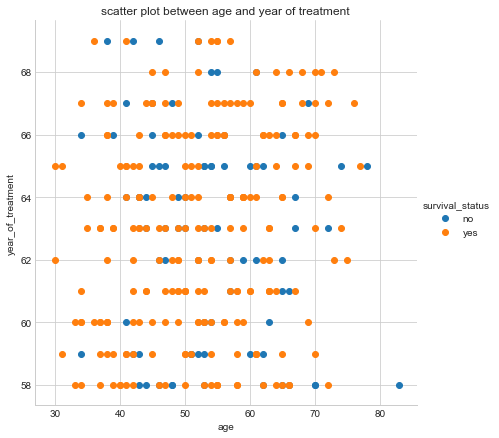

In [22]:
plt.close()
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue="survival_status",size=6) \
    .map(plt.scatter,"age","year_of_treatment") \
    .add_legend()
plt.title('scatter plot between age and year of treatment')
plt.show()

#### **observation**
- very hard to distinguish between survived and died on the basis on age and year of treatment. 

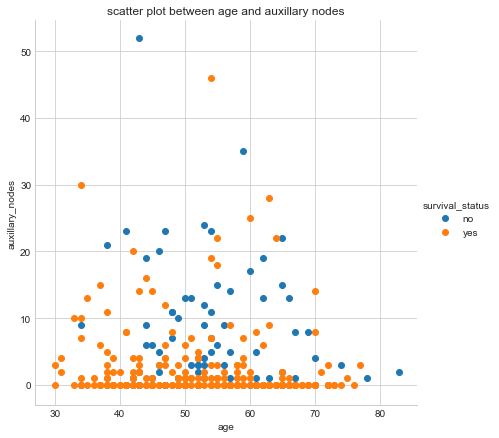

In [23]:
# checking 'Age' vs 'number of auxillary node' 

sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue="survival_status",size=6) \
    .map(plt.scatter,"age","auxillary_nodes") \
    .add_legend()
plt.title('scatter plot between age and auxillary nodes')

plt.show()

#### **observation**
- very hard to distinguish between survived and died on the basis on age and auxillary nodes.

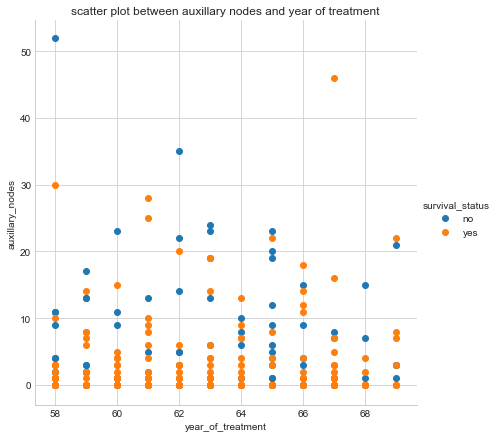

In [24]:
# year of  treatement vs Auxillary

sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue="survival_status",size=6) \
    .map(plt.scatter,"year_of_treatment","auxillary_nodes") \
    .add_legend()
plt.title('scatter plot between auxillary nodes and year of treatment')

plt.show()

#### **observation**
- survived patients having positive auxillary nodes between 0 to 5.

**Pair plots**

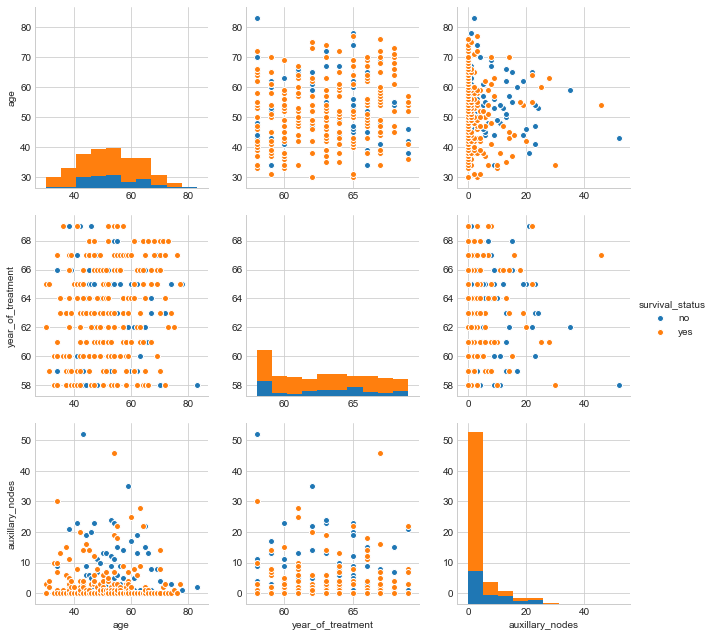

In [28]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(dataset, hue ="survival_status", size = 3);
plt.show()

#### **Observations**
- It can be seen that auxillary_nodes attribute plays significant role.

## **Conclusion** : 
 -  As we can see the better classification between  {year_of_treatment, auxillary_nodes} and {age, auxillary_nodes} as compared to other scatter plots.
    